In [141]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [132]:
def load_training_batch(folder_path,batch_id):
    """
    Args:
        folder_path: the directory contains data files
        batch_id: training batch id (1,2,3,4,5)
    Return:
        features: numpy array that has shape (10000,3072)
        labels: a list that has length 10000
    """

    ###load batch using pickle###
    file_name = folder_path + '/data_batch_' + str(batch_id)
    dict = unpickle(file_name)

    return dict

In [133]:
def load_testing_batch(folder_path):
    """
    Args:
        folder_path: the directory contains data files
    Return:
        features: numpy array that has shape (10000,3072)
        labels: a list that has length 10000
    """

    ###load batch using pickle###
    file_name = folder_path + '/test_batch'
    dict = unpickle(file_name)

    return dict

In [134]:
dict = unpickle("D:\Work\EPE\PracticalIntroductionNN\HW2_template\cifar-10-batches-py\data_batch_1")
print(dict.keys())
print()



dict_keys(['batch_label', 'labels', 'data', 'filenames'])



In [135]:
def features_reshape(features):
	"""
	Args:
		features: a numpy array with shape (10000, 3072)
	Return:
		features: a numpy array with shape (10000,32,32,3)
	"""
	features = np.reshape(features, (10000,32,32,3), order='F')
	return features

In [136]:
def display_data_stat(folder_path,batch_id,data_id):
	"""
	Args:
		folder_path: directory that contains data files
		batch_id: the specific number of batch you want to explore.
		data_id: the specific number of data example you want to visualize
	Return:
		None
	Descrption: 
		1)You can print out the number of images for every class. 
		2)Visualize the image
		3)Print out the minimum and maximum values of pixel 
	"""
	file_name = folder_path + '/data_batch_' + str(batch_id)
	dict = unpickle(file_name)
	features = dict["data"]
	features = features_reshape(features)
	image = features[data_id] # np.squeeze(features[data_id,:,:,:])
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	pixels = np.array(image)
	plt.imshow(pixels)
	plt.show()

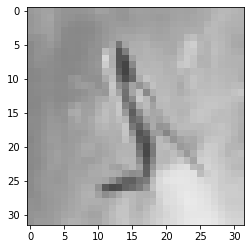

In [137]:
display_data_stat("cifar-10-batches-py", 2, 5000)

In [145]:
def preprocess_data(folder_path):
    """
    Args:
        folder_path: the directory contains your data files
    """
    # read training data
    vali_ratio = 0.1
    for i in range(1,6):
        dict = load_training_batch(folder_path, i)
        features = dict['data']
        labels = dict['labels']
        
        if i == 1:
            total_features = features
            total_labels = labels
        else:
            total_features = np.concatenate((total_features, features), axis=0)
            total_labels = np.concatenate((total_labels, labels), axis=0)
    
    length = len(total_labels)
    vali_length = int(length*vali_ratio)
    vali_features = total_features[range(vali_length),:]
    vali_labels = np.array(total_labels[range(vali_length)])
    train_features = total_features[vali_length:length,:]
    train_labels = np.array(total_labels[vali_length:length])
    
    # normalization
    dict = load_testing_batch(folder_path)
    test_features = dict['data']
    test_labels = np.array(dict['labels'])

    # min max normalization
    scaler = MinMaxScaler()
    vali_features = scaler.fit_transform(vali_features)
    #print(scaler.data_max_)
    train_features = scaler.transform(train_features)
    test_features = scaler.transform(test_features)
    
    print(train_labels.shape)

    # one hot encoding
    train_labels = train_labels.reshape(-1,1)
    vali_labels = vali_labels.reshape(-1,1)
    test_labels = test_labels.reshape(-1,1)

    onehot_encoder = OneHotEncoder(handle_unknown='ignore')
    train_labels = onehot_encoder.fit_transform(train_labels)
    vali_labels = onehot_encoder.transform(vali_labels)
    test_labels = onehot_encoder.transform(test_labels)

    
    print(train_labels.shape)

    # save pickle
    with open('train_data.pickle', 'wb') as f:
        pickle.dump((train_features,train_labels), f)

    with open('val_data.pickle', 'wb') as f:
        pickle.dump((vali_features,vali_labels), f)

    with open('test_data.pickle', 'wb') as f:
        pickle.dump((test_features,test_labels), f)
    
